In [ ]:
In this section, We used Python's Scikit-Learn library to implement the KNN algorithm.

The Dataset

We are going to use oil & gas dataset for our KNN example. The dataset consists of nine attributes: Vsl, Vsg, VisL, 
VisG, DenL, DenG, ST, Ang and ID. The task is to predict the classes of the flow patterns based on the dataset inputs. 
There are six classes in the dataset: 1, 2, 3, 4, 5, 6

In [1]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importing of dataset to dataframe. 
df = pd.read_csv("BD12Experiments6FP.csv")

In [3]:
#Separating independant variable and dependent variable("FlowPattern")
X = df.drop(['FlowPattern'], axis=1)
y = df['FlowPattern']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(9029, 9)
(9029,)


In [4]:
# Splitting the dataset to Train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
#to know the shape of the train and test dataset.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6320, 9)
(6320,)
(2709, 9)
(2709,)


In [6]:
# Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Training 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
# Predictions
y_pred = classifier.predict(X_test)

In [9]:
# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 206    0    5    0   32    0]
 [   0  130    4    4   21    0]
 [   0   21  240   24   32    0]
 [   0    3   30  452   41    0]
 [  32   18   16   65 1272   19]
 [   0    0    0    0    9   33]]
              precision    recall  f1-score   support

           1       0.87      0.85      0.86       243
           2       0.76      0.82      0.79       159
           3       0.81      0.76      0.78       317
           4       0.83      0.86      0.84       526
           5       0.90      0.89      0.90      1422
           7       0.63      0.79      0.70        42

    accuracy                           0.86      2709
   macro avg       0.80      0.83      0.81      2709
weighted avg       0.86      0.86      0.86      2709



In [10]:
# Comparing Error Rate with the K Value

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

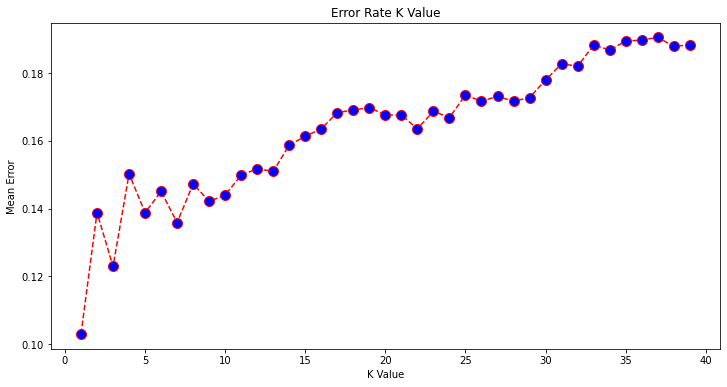

In [11]:
# Plotting the error values against K values
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [12]:
# Parameters Optimization
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1, weights="distance")
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1, weights='distance')

In [13]:
# Predictions
y_pred = classifier.predict(X_test)

In [14]:
# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 226    0    1    0   16    0]
 [   0  127    2    0   30    0]
 [   0   13  263   13   28    0]
 [   0    2   29  466   29    0]
 [  19   12   25   38 1314   14]
 [   0    0    0    0    8   34]]
              precision    recall  f1-score   support

           1       0.92      0.93      0.93       243
           2       0.82      0.80      0.81       159
           3       0.82      0.83      0.83       317
           4       0.90      0.89      0.89       526
           5       0.92      0.92      0.92      1422
           7       0.71      0.81      0.76        42

    accuracy                           0.90      2709
   macro avg       0.85      0.86      0.86      2709
weighted avg       0.90      0.90      0.90      2709



In [ ]:
# Confusion Matrix Befor Parameters Optimization

# 86 % Accuracy

For class 1, the algorithme received 243 samples and classified 207, missclassified 37
For class 2, the algorithme received 159 samples and classified 130, missclassified 29
For class 3, the algorithme received 317 samples and classified 240, missclassified 77
For class 4, the algorithme received 526 samples and classified 452, missclassified 74
For class 5, the algorithme received 1422 samples and classified 1272, missclassified 150
For class 7, the algorithme received 42 samples and classified 33, missclassified 9


In [ ]:
# Confusion Matrix After Parameters Optimization

# 90 % Accuracy

For class 1, the algorithme received 243 samples and classified 226, missclassified 17
For class 2, the algorithme received 159 samples and classified 127, missclassified 32
For class 3, the algorithme received 317 samples and classified 263, missclassified 54
For class 4, the algorithme received 526 samples and classified 466, missclassified 60
For class 5, the algorithme received 1422 samples and classified 1314, missclassified 108
For class 7, the algorithme received 42 samples and classified 34, missclassified 8